# Homework Data Cleaning Python

- Nama: Mela Feriani Simanjuntak
- IPK / Nilai Rapot: 4,01

Catatan:
1. Boleh google, YOLO apalagi biar ada gregetnya
2. Boleh dikerjakan sambil makan, push rank, skripsian, tesis, disertasi, nonton spiderman no way home, mengendarai pesawat terbang, terbang kebulan, tapi ga boleh dikerjakan sama mantan.
3. Kalau mau nyontek, `main rapih ya`, kalau ketauan jawabannya sama persis / similarity score > 80%, dua-duanya mendapatkan nilai 0 (Udah banyak korban di batch-batch sebelumnya)
4. Mohon ganti nama file sebagaimana mestinya, sesuai EYD dan tata penulisan yang diakui multiverse
5. Keterangan dataset (informasi kolom-kolom) bisa diakses disini https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [88]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Data Cleaning (100 pts)

Divisi kamu memiliki OKR (Objective Key Result) yang salah satu initiative nya adalah ingin melakukan resurrection pada churn user serta preventing churn based on user behavior hingga bisa mendapatkan 25% churn user pada Q1 2022. Langkah pertama yang ingin di automasi adalah ingin menebak apakah user tertentu masuk dalam kategori churn atau tidak. 

Kamu sebagai data scientist, sebelum melakukan pemodelan, kamu perlu untuk membersihkan dan menyiapkan data agar bisa digunakan untuk keperluan yang ada.

> Lakukanlah pembersihan data pada data telco ini, pembersihan data dapat meliputi **seluruh** metode yang telah dipelajari di kelas, meliputi a) Handle Missing Value and Duplicated Rows (20 pts); b) Outlier Management (30 pts); c) Feature Transformation (Numerical and Categorical) (50 pts)

**Catatan**
- Tidak ada standarisasi harus mengikuti langkah-langkah yang mana, semakin lengkap, semakin bagus skornya. Ingat, ketika ingin train model ML, maka seluruh feature yang ada wajib berupa numerical value.

In [139]:
df = pd.read_csv("session_9_homework_telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [140]:
df.shape

(7043, 21)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [142]:
# ‘Total Charges’ should be numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

# 1. Handling Missing Value and Duplicated Rows

## a. Sigma Rule for Feature Removal

In [143]:
# Find out is there any potential of duplicated columns or not based on column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There is no potential of Duplicated Columns

In [144]:
# renaming 'tenure' and 'gender'
df = df.rename(columns={'tenure': 'Tenure', 'gender': 'Gender'})

No need to renaming `customerID`, because it will be dropped soon.

In [145]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [146]:
# Duplicate Rows?
df.duplicated().sum()

0

We don't have any duplicated rows.

In [147]:
# Missing Value Information
df.isnull().sum()

customerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [148]:
# Missing Value Information in Percentage
(100.00 * df.isnull().sum()) / df.shape[0]

customerID          0.000000
Gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
Tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

No need to remove feature.

In [149]:
#Drop customerID column
df.drop(['customerID'], axis=1, inplace=True)

## b. Numerical Imputation

In [150]:
df_numerical = df.select_dtypes(include=["int","float"])
df_numerical.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [151]:
df_numerical.isnull().sum()

SeniorCitizen      0
Tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [152]:
print(df[df['TotalCharges'].isna()].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [153]:
print(df[df['Tenure'].isin([0])].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')



`Tenure` = Number of months the customer has stayed with the company



We can see that the missing values in `TotalCharges` feature have **0** value in `Tenure` feature. So that's explainable because, there are no tenure, so the total charges is may zero too.

We can also fill it with `MonthlyCharges`, but I choose to fill it with **0**.



In [154]:
# we can replace those missing values with '0'.
df_numerical["TotalCharges"] = df_numerical["TotalCharges"].fillna(0)

In [155]:
df_numerical.isnull().sum()

SeniorCitizen     0
Tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

## c. Categorical Imputation

In [156]:
df_categorical = df.select_dtypes(exclude=["int","float"])
df_categorical.head()

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [157]:
df_categorical.shape

(7043, 16)

In [158]:
df_categorical.isnull().sum()

Gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

There are no missing value in the categorical data.

In [159]:
# Finalize (combine both numerical and categorical data frame using concat)
# Concat axis 1 --> Column
# Concat axis 0 --> Row
df = pd.concat([df_numerical,df_categorical],axis=1)
df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0,34,56.95,1889.50,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,0,2,53.85,108.15,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0,45,42.30,1840.75,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,0,2,70.70,151.65,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


# 2. Handle Outlier

In [160]:
df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0,34,56.95,1889.50,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,0,2,53.85,108.15,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0,45,42.30,1840.75,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,0,2,70.70,151.65,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


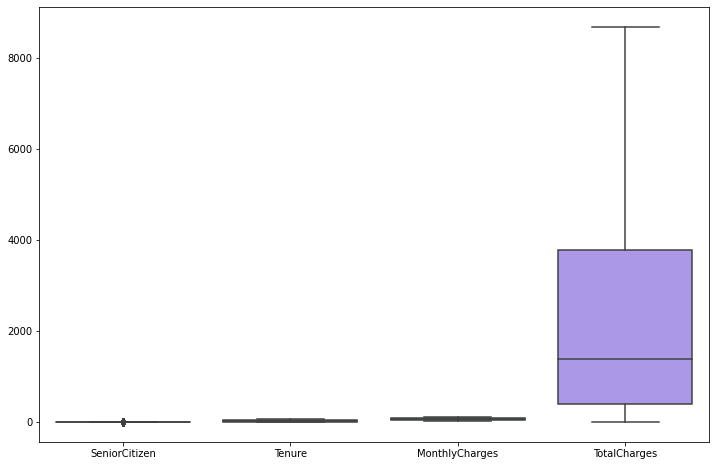

In [161]:
# Use Boxplot

# Figure Size Setting
plt.figure(figsize=(12,8))

# Boxplot using Seaborn
sns.boxplot(data= df,
            palette="husl")

# Show the plot
plt.show()

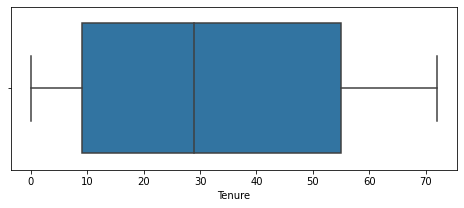

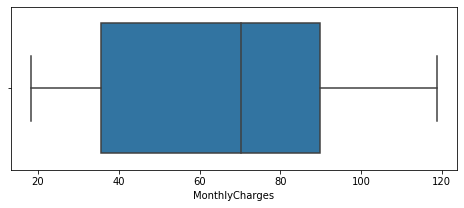

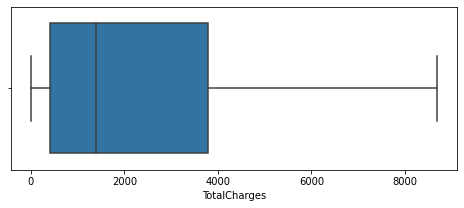

In [162]:
# check outliers
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(df[col])

The Data only has 3 numerical variables, and the rest are categorical.

Outliers: The box plots show there is no outliers in this data set. So we don't have to handle any outlier.



But we still can see something without really implementing it to our data. We will try it on `ToptalCharges` since the boxplot have longest right whisker.

In [163]:
from scipy import stats

# Copy dataframe
df_zscore = df.copy()

# Ensure there is no missing value inside the feature
df_zscore["TotalCharges"] = df_zscore["TotalCharges"].fillna(df_zscore["TotalCharges"].mean())

# Calculate the Zscore based on Absences
df_zscore["TotalCharges_Zscore"] = abs(stats.zscore(df_zscore["TotalCharges"]))
# Filter by Zscore < 3
df_zscore = df_zscore[df_zscore["TotalCharges_Zscore"] < 3]

Data Dimension before Zscore Method: (7043, 20)
Data Dimension after Zscore Method: (7043, 21)


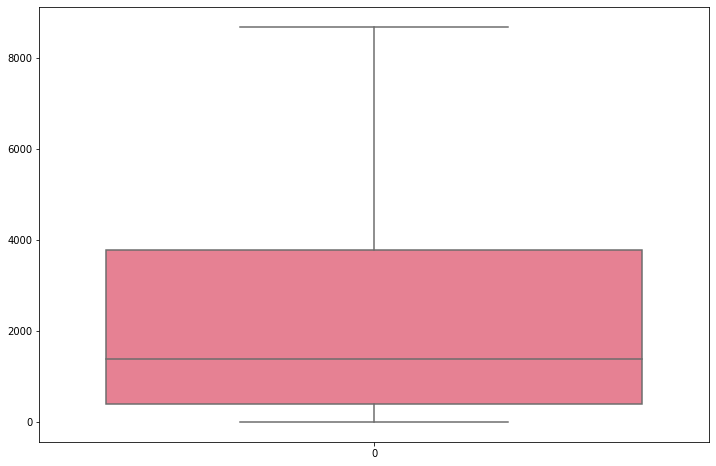

In [164]:
print(f"Data Dimension before Zscore Method: {df.shape}")
print(f"Data Dimension after Zscore Method: {df_zscore.shape}")

# Create Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df_zscore["TotalCharges"],palette="husl")
plt.show()

We now can really be sure that there is no outlier in this Data set.

I tried to use *remove_outliers* function from the hands on, but it dropped like 2000 values, and I choose not to use it in my data. 

# 3. Feature Transformation

> When to use Feature Transformation (Numerical and Categorical Encoding) ?

1. Feature Transformation is **absolutely prohibited** for exploratory data analysis, yet useful for machine learning preparation 
2. Numerical encoding (scaling, standardization) is optional when the distribution of all features are extremely unequal / data range between features is too high. On the other hand, this is mandatory when you want to use unsupervised ML (i.e., clustering)
3. Categorical encoding can be used only for machine learning purpose

In [165]:
# Make a copy for Feature Transformation
df_ft = df.copy()

We will use a copied data for Encoding

## a. Numerical (Scaling, Standardization)


Our Numerical Variables are = Tenure, MonthlyCharges, TotalCharges


SeniorCitizen is not a numerical value, but a nominal, categorical variables contain Yes No, with 1 and 0 (numerical value).

In [166]:
numericals = ["Tenure","MonthlyCharges", "TotalCharges"]
df_ft[numericals].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


For this data set we will do Numerical Encoding for `Tenure`, `MonthlyCharges`, `TotalCharges`.

In [167]:
# Features
print(df_ft["Tenure"].tolist()[:20])
print(df_ft["MonthlyCharges"].tolist()[:20])
print(df_ft["TotalCharges"].tolist()[:20])

[1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 10, 21]
[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05]
[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95, 587.45, 326.8, 5681.1, 5036.3, 2686.05, 7895.15, 1022.95, 7382.25, 528.35, 1862.9]


In [172]:
# Feature Scaling (n - m)
# As an example, value range is between 0 - 1
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
df_ft['Tenure'] = minmax_scaler.fit_transform(df_ft['Tenure'].values.reshape(len(df_ft), 1))
df_ft['MonthlyCharges'] = minmax_scaler.fit_transform(df_ft['MonthlyCharges'].values.reshape(len(df_ft), 1))
df_ft['TotalCharges'] = minmax_scaler.fit_transform(df_ft['TotalCharges'].values.reshape(len(df_ft), 1))

In [173]:
# Show the data
print(df_ft["Tenure"].tolist()[:20])
print(df_ft["MonthlyCharges"].tolist()[:20])
print(df_ft["TotalCharges"].tolist()[:20])

[0.013888888888888888, 0.4722222222222222, 0.027777777777777776, 0.625, 0.027777777777777776, 0.1111111111111111, 0.3055555555555555, 0.1388888888888889, 0.38888888888888884, 0.861111111111111, 0.18055555555555555, 0.2222222222222222, 0.8055555555555555, 0.6805555555555555, 0.3472222222222222, 0.9583333333333333, 0.7222222222222222, 0.986111111111111, 0.1388888888888889, 0.29166666666666663]
[0.11542288557213931, 0.3850746268656716, 0.35422885572139307, 0.23930348258706463, 0.5218905472636816, 0.8099502487562189, 0.7049751243781094, 0.11442786069651739, 0.8611940298507462, 0.3771144278606965, 0.3154228855721393, 0.006965174129353213, 0.8169154228855721, 0.8502487562189055, 0.8681592039800995, 0.945273631840796, 0.023880597014925342, 0.8800995024875623, 0.36766169154228856, 0.7144278606965173]
[0.0034370394252026537, 0.21756401989683127, 0.012452791083271925, 0.21195076455416362, 0.017461542004421522, 0.09447540530582167, 0.22446112748710395, 0.03476188282977156, 0.3507334653647753, 0.4

In [174]:
# Feature Normalization / Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

df_ft[num_cols] = scaler.fit_transform(df_ft[num_cols])

In [175]:
# Show the data
print(df_ft["Tenure"].tolist()[:20])
print(df_ft["MonthlyCharges"].tolist()[:20])
print(df_ft["TotalCharges"].tolist()[:20])

[-1.2774445836787653, 0.0663274190822361, -1.236724219958735, 0.51425142000257, -1.236724219958735, -0.992402037638553, -0.42231694555812815, -0.9109613101984922, -0.17799476323794608, 1.2064976032430856, -0.7888002190384013, -0.6666391278783101, 1.0436161483629642, 0.6771328748826911, -0.30015585439803705, 1.491540149283298, 0.7992939660427824, 1.572980876723359, -0.9109613101984922, -0.4630373092781585]
[-1.1603229160349193, -0.2596289419448806, -0.3626603559551801, -0.7465354629935549, 0.19736523310080323, 1.1595456961969888, 0.8089065291619365, -1.1636465100352518, 1.3307107872140993, -0.28621769394753865, -0.49228052196813776, -1.5225946620711344, 1.182810854199314, 1.2941512532104449, 1.353975945216425, 1.6115544802421744, -1.4660935640654862, 1.3938590732204124, -0.31779183695069485, 0.8404806721650927]
[-0.9926105235902256, -0.17216470898960828, -0.9580659010627457, -0.19367237627204323, -0.9388744441030346, -0.6437892489880275, -0.14573785216462665, -0.8725867105812736, 0.3380

So, from the experiment. If we want to apply numerical feature transformation to our numerical features, we will choose *StandardScaler*.

In [177]:
# Our Data after Numerical Feature Transformation
df_ft.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,-1.277445,-1.160323,-0.992611,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0,0.066327,-0.259629,-0.172165,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,0,-1.236724,-0.362660,-0.958066,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0,0.514251,-0.746535,-0.193672,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,0,-1.236724,0.197365,-0.938874,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


## b. Categorical (Encoding)

1. One-hot Encoding (Binary, 1 / 0)
    - Use when unique value < 5
2. Ordinal Encoding (Grade, 1 < 2 < 3 < ... < n)
    - The method itself can be applied to categorical data type (nominal, ordinal)
3. Frequency Encoding (Based on its appearance)
    - Use when unique value >= 5

In [178]:
df_ft.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,-1.277445,-1.160323,-0.992611,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0,0.066327,-0.259629,-0.172165,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,0,-1.236724,-0.362660,-0.958066,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0,0.514251,-0.746535,-0.193672,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,0,-1.236724,0.197365,-0.938874,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [179]:
#Copying function from google to make my life easier
def cat_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')


In [181]:
cat_unique(df_ft)

Gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


I believe that ***No internet service*** or ***No phone service*** means **NO**. So I will just replace them with **NO**.

In [183]:
df_ft.replace('No phone service', 'No', inplace=True)
df_ft.replace('No internet service', 'No', inplace=True)

In [185]:
cat_unique(df_ft)

Gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Encoding Categoricals Columns that have **Yes** and **No** value, with **1** and **0**.

Partner, Dependants, PhoneService, PhoneService, MultipleLines,  OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, Churn.



In [186]:
cat_cols = ['Partner','Dependents','PhoneService',
            'MultipleLines','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies',
            'PaperlessBilling','Churn']

for col in cat_cols:
    df_ft[col].replace({'Yes': 1, 'No': 0}, inplace=True)

Encoding Gender Column which have **"Female"** and **"Male"**, with **1** and **0**.

In [189]:
df_ft['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [190]:
print_cat_unique(df_ft) 

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Now we are left with the last three features; `InternetService`,`Contract`,`PaymentMethod`, We will use `pd.get_dummies` method in order to create more features in the data set.

In [191]:
dummies_encoding = ['InternetService','Contract','PaymentMethod']

df_ft = pd.get_dummies(data=df_ft, columns=dummies_encoding)

In [192]:
df2.dtypes

SeniorCitizen                                int64
Tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Gender                                       int64
Partner                                      int64
Dependents                                   int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [193]:
#Our Data After Categorical Encoding
df_ft.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0.066327,-0.259629,-0.172165,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1
3,0,0.514251,-0.746535,-0.193672,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,0,-1.236724,0.197365,-0.938874,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0


# 4. OUR FINAL DATASET

Our Final dataset **before features transformation** that it's maybe best for Data Analysis

In [194]:
df.to_csv('Telco_Customer_Churn.csv')

Our Final dataset **after features transformation** that it's maybe best for Modelling

In [195]:
df_ft.to_csv('Telco_Customer_Churn_FT.csv')